# TensorFlow MNIST with Multi-Layer Perceptron

In [2]:
import tensorflow as tf

Grabbing the data...

They are handwritten images, which will be pixel values in the from of an array

This dataset is built into tensorflow, as it is so common

In [3]:
from tensorflow.examples.tutorials.mnist import input_data

In [4]:
mnist = input_data.read_data_sets("/tmp/data", one_hot=True)

Extracting /tmp/data\train-images-idx3-ubyte.gz
Extracting /tmp/data\train-labels-idx1-ubyte.gz
Extracting /tmp/data\t10k-images-idx3-ubyte.gz
Extracting /tmp/data\t10k-labels-idx1-ubyte.gz


So now we'll see the type of the mnist dataset in tensorflow and we will see the shape

Each image in 28x28 - so in a flattened vector - 784 pixel values

There are 55000 images in the MNIST dataset

In [5]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [6]:
mnist.train.images.shape

(55000, 784)

We can also visualise the data - if you want.

So they are stored as flattened arrays - but we can reshape them to see the actual array values shaped in an image

In the line below we are:
    - getting the 10th image
    - reshaping to 28x28
    
NOTE: All pixels are greyscale values from 0 to 1

In [7]:
mnist.train.images[10].reshape(28,28)

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.    

We can visiaulse this data with matplotlib - to reproduce the original

So image 10 is a '0'

In [8]:
import matplotlib.pyplot as plt

In [9]:
%matplotlib inline

In [10]:
sample = mnist.train.images[10].reshape(28,28)

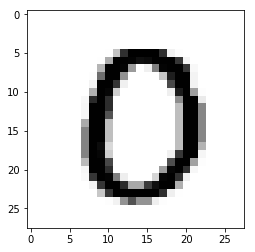

In [11]:
plt.imshow(sample,cmap='Greys')

Now we know what the data looks like, we will now define some parameters

## Defining Parameters:

Parameters:
    - Learning Rate - How quickly we adjust the cost function (tradeoff by setting it to very small vs setting is veyr big)
    - Number of epochs - How many training cycles to go through - going through the same data over and over again
    - Batch Size - sizes of the training data

In [12]:
learning_rate = 0.001
training_epochs = 15
batch_size = 100

Network Parameters: - Define what the NN or Multi-Layer Perceptron looks like:
    - n_classes - ten types of inputs and outputs (0-9)
    - n_samples - number of samples in the training data (55000) - can get the number by 'mnist.train.num_examples'
    - n_input - what we expect the input to look like - 28x28 flattened vector so 784 inputs going in
    - The model will have 2 hidden layers each with 256 nodes:
        - n_hidden_1 - number of nuerons in hidden layer 1
        - n_hidden_2 - number of neurons in hidden layer 2

Why 256?
    - Computers have a way of storing image information as 8 bit color storage

In [13]:
n_classes = 10
n_samples = mnist.train.num_examples
n_input = 784
n_hidden_1 = 256
n_hidden_2 = 256

Plan of Attack:
    - First, Recieve input image data array
    - Send it to the first hidden layer with weights multiplied and a bias
    - Sent to next hidden layer with weights multiplied
    - Then sent to output layer
    - Calculate the error - Loss Function or Cost Function - How far off the desired result we are?
    - Apply optimisation function to try and minimise the cost/error
        - This is done by adjusting the weights accordingly across the whole network
        - We will be using the adam optimiser
            - This depends on the learning rate - the lower the rate, the higher the accuracy but really slow to reach target and after a certian amaount of time - there is no point to lower cost as it has already reached minimum
            - The higher the rate, low accuracy, may never converge, may bouce around accuracy

## Creating a function for a multi-layer perceptron:

INFO:
RELU Activtaion function - good from images - rectifier function - either returns an x or 0 - whichever is greater
Output layer Activation Function - Linear activation function - matrix multiplication
2 hidden layers

This function will take 3 arguments:
    - x
    - Weights
    - biases

So in the first layer:
    - Mutiply all the x and weight values toghether (h1 contains weights for hidden layer 1) (NEEDS TO MATRIX MULTIPLY ALWAYS)
    - The add all of the values of each x * weight and the bias summed together.
    - Then we pass the value into the RELU Function
        - What RELU does: f(x) = max(0,x)
        
The same as above is going on in the second layer

In [14]:
def multilayer_perceptron(x, weights,biases):
    '''
    x: Placeholder for Data Input
    weights: Dict of weights
    biases: dict of bias values
    '''
    
    ### First Hidden Layer with RELU Activation Function
    # X * W + B
    layer_1 = tf.add(tf.matmul(x,weights['h1']),biases['b1'])
    # RELU(X * W + B) -> f(x) = max(0,x)
    layer_1 = tf.nn.relu(layer_1)
    
    ### Second Hidden Layer
    # X * W + B
    layer_2 = tf.add(tf.matmul(layer_1,weights['h2']),biases['b2'])
    # RELU(X * W + B) -> f(x) = max(0,x)
    layer_2 = tf.nn.relu(layer_2)
    
    ### Last Output Layer
    out_layer = tf.matmul(layer_2,weights['out']) + biases['out']
    
    return out_layer

## Weights

We will now introduce tensorflow variables - This is a modifiable value, can even be modified by computation graph

Generally, Model parameter are tensorflow variables

REMEMBER: Weights are random to start off with, they will be fined tuned by the NN when calculating the cost/error

tf.random_normal - outputs random values from a normal distribution - used to randomly initialise
    - tf.random.normal([row, columns]) - creates a matrix of random values, with certain number of rows and columns

WHY IS A MATRIX? HOW WILL THE VALUES GET ASSIGNED?
    - So the input is 784 different pixel values and the next layer is made of 256 neurons. Each neuron in the input layer will
      be connected to all neurons in the next layer and therefore there will be 784*256 weights, therefore assigning each 
      branch with a weight.

In [15]:
#Creating the weights dictionary
'''
    h1 - martix of randomly assigned values from a normal distribution. rows=784, columns=256
    h2 - martix of randomly assigned values from a normal distribution. rows=256, columns=256
    out - matric of randomly assigned values from a normal distribution. rows=256, columns=10
'''
weights = {
    'h1':tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2':tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out':tf.Variable(tf.random_normal([n_hidden_2,n_classes]))
}

WAIT! What will the output look like:
    - Well remeber above we set one-hot to true
    - so 0 is represented as [1 0 0 0 0 0 0 0 0 0]
         1 is represented as [0 1 0 0 0 0 0 0 0 0]
         etc...
    - So the output will also be an array like this 
      EG) it predicts it is 4 so output will be [0 0 0 0 1 0 0 0 0 0]

## Biases:

Biases are are the same size as the layer

In [16]:
biases = {
    'b1':tf.Variable(tf.random_normal([n_hidden_1])),
    'b2':tf.Variable(tf.random_normal([n_hidden_2])),
    'out':tf.Variable(tf.random_normal([n_classes])) 
}

Now we will set two placeholders for x and y

x - The same size as the input as the input is 784 array

y - output - will be a 10 element array as there are only 10 outputs

In [17]:
x = tf.placeholder('float', [None, n_input])

In [18]:
y = tf.placeholder('float',[None,n_classes])

## Setting up the model:

In [19]:
pred = multilayer_perceptron(x,weights,biases)

## Define cost and optimiser functions

We will use built in tensorflow functions for these parts

In [20]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred,labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# Training The Model:

Training Stage:

### Batch Explaination

Convinence:
    - There is a mnist methods which allows you to get the a certain amount of batch data:
    - The result will be a batch of the training data - it will contain 2 elements:
        - The first element is the 728 array of pixel values
        - The second element is the label for that data in one_hot form

In [21]:
###CONVINENCE BATCH EXPLANATION:
#In this case we will only get 1 sample to test this - but the batch size for this is 100 - as defined earlier
t = mnist.train.next_batch(1)

xSample, ySample = t

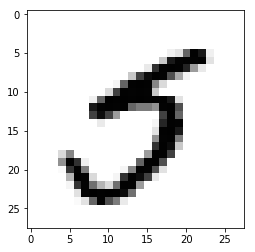

In [22]:
plt.imshow(xSample.reshape(28,28),cmap='Greys')

In [23]:
ySample

array([[ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.]])

As you can see:
    - xSample contains the image data - in this case a '4'
    - ySample is the label for that image, in one hot form - also representing a '4'
    
### End Of Batch Example Explaination

# Running the Session  :)

In [24]:
sess = tf.InteractiveSession()

Lets start by initalising all the varibales in the tensorflow session:

In [25]:
init = tf.global_variables_initializer()

In [26]:
sess.run(init)

Lets now actually train the model for the number of epochs we defines (15):

More Info:
    - So basically we get the total batch - 550
    - Next we extract the x = the image data and the y = the label for those images correspondingly
    - Do the training for that epoch and return the cost
    - At the end of 15 loops/epochs - the model has been trained on the data

In [27]:
for epoch in range(training_epochs):
    
    #Cost
    avg_cost = 0.0
    
    #Define total_batch as an integer
    #55000/100 = 550 batches
    total_batch = int(n_samples/batch_size)
    
    for i in range(total_batch):
        # Grab the next batch of data using the batch explaination i did above ^^^
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        
        #print("x:",len(batch_x))
        #print("y:",len(batch_y))
        print(i)
        #Optimisation and Loss values - the '_' is a unwanted variable for tuple unpacking
        #This will return a loss - which is assigned to 'c'
        _, c = sess.run([optimizer, cost], feed_dict={x:batch_x, y:batch_y})
        
        avg_cost += c/total_batch
        
    print("Epoch: {} Cost{:.4f}".format(epoch+1,avg_cost))

print("Model has completed {} Epochs of training".format(training_epochs))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

# Evaluating the Model:

Evaluation:

tf.equal is basically the same as '==' operator and returns a boolean True of False

We passed in the pred - the multilayer perceptron returning the out layer:
    - Find argmax where it is equal to 1 (Find the index location in predicted label where it is equal to 1)

Next get me the actual true labelled values of the data (get the index that is equal to 1)

Then using tf.equal using a True and Flase, tell me how many we got correct and wrong

In [28]:
correct_predictions = tf.equal(tf.argmax(pred,1),tf.argmax(y,1))

In [29]:
print(correct_predictions[0])

Tensor("strided_slice:0", shape=(), dtype=bool)


This outputs a tensor type boolean - so we have to cast the tensor to a boolean

Then we need to get the mean across the whole of correct predictions

Next we call in the MNIST labels and evaluate for accuracy

We use the eval method to evaluate answers with the testing set images and labels

In [30]:
correct_predictions = tf.cast(correct_predictions, 'float')

In [31]:
print (correct_predictions[0])

Tensor("strided_slice_1:0", shape=(), dtype=float32)


In [32]:
accuracy = tf.reduce_mean(correct_predictions)

In [33]:
accuracy.eval({x:mnist.test.images, y:mnist.test.labels})

0.94900018

In [34]:
mnist.train.num_examples

55000

In [36]:
correct_predictions.get_shape

<bound method Tensor.get_shape of <tf.Tensor 'Cast_1:0' shape=(?,) dtype=float32>>